# Question 1

#### 1
Simple Linear Regression models the relationship between one predictor, which is: outcome=β0+β1 predictor

But Multiple Linear Regression includes more than one predictor, which is: outcome=β0+β1predictor1+β2predictor2+......βkpredictork

The benefit of Multiple Linear Regression is multiple predictors can explain more variance, showing complex relationships and interactions.


#### 2
Continuous variable represents a variable that can take a range of values, for example, height, age......Which can be written as outcome=β0+β1continuous variable

Indicator variable represents binary states, for example, gender......Which can be written as outcome=β0+β1 1(indicator)

#### 3
Adding indicator variables to create a multiple linear regression allows for different intercepts to be considered depending on the state of the indicator variables, effectively modeling separate lines for each grouping, but with the same slope.

The model would be outcome=β0+β1continuous variable+β2 1(indicator)

#### 4
The interaction term allows for different slopes for each group defined by the indicator. The continuous predictor's effect changes based on the indicator's state.

Model: outcome=β0+β1continuous variable+β2 1(indicator)+β3(continuous * 1(indicator))

#### 5
Encodes a categorical variable with K levels using K-1 indicator variables. One category (baseline) has an intercept of β0, and each other category shifts the intercept by βi

Model: outcome = $\beta_0$ + $\beta_1$1(category1) + $\beta_2$1(category2) + ......$\beta_{k-1}$1(categoryk-1)

# Question 2

#### 1
##### Outcome and Predictor Variables
Outcome Variable (Y): Sales revenue or number of sales resulting from the advertising campaigns.
Predictor Variables (X1 and X2):
X1: Amount spent on TV advertising (continuous).
X2: Amount spent on online advertising (continuous).
##### Linear Forms
Without Interaction: Y = $\beta_0$ + $\beta_1$X1 + $\beta_2$X2 + ϵ

This model assumes that the effects of TV and online advertising on sales are independent of each other. It estimates how much each dollar spent on TV or online contributes to sales, separately.

With Interaction: Y = $\beta_0$ + $\beta_1$X1 + $\beta_2$X2 + $\beta_3$(X1 * X2) + ϵ

This model includes the term $\beta_3$(X1 * X2), which represents the interaction effect between TV and online advertising. It adjusts for scenarios where the effectiveness of one advertising type changes depending on the level of the other. Predictions here capture more nuanced relationships, possibly showing that combined advertising efforts have a multiplicative effect on sales.

#### 2
suppose advertising budgets are either “high” or “low,” represented as binary variables:

X1: High/Low TV advertising budget (coded as 1 for “high” and 0 for “low”).
X2: High/Low online advertising budget (coded similarly).
##### Linear Forms
Without Interaction: Y = $\beta_0$ + $\beta_1$X1 + $\beta_2$X2 + ϵ

This model estimates how sales change when moving from a “low” to a “high” budget for TV or online, independently.

With Interaction: Y = $\beta_0$ + $\beta_1$X1 + $\beta_2$X2 + $\beta_3$(X1 * X2) + ϵ

$\beta_3$(X1 * X2) captures how the combination of high/low budgets for both platforms affects sales. It allows for the model to show that having both budgets set to “high” might lead to a combined effect greater or lesser than the sum of their individual effects.

# Question 3

## There's a bug I haven't been able to fix, and neither has ChatGPT, so I have to skip over it

In [14]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# Load the dataset with updated error handling
file_path = 'https://github.com/LeoLuLL/LeoLu-Sta130/blob/main/CSCS.csv'
cscs_data = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip', skip_blank_lines=True).fillna('')

# Create a binary outcome variable for logistic regression
cscs_data['social_media_binary'] = (cscs_data['CONNECTION_social_media_time_per_day'] == '2-3 hours per day').astype(int)

# Scale the continuous predictor variable to help with convergence
scaler = StandardScaler()
cscs_data['DEMO_age_scaled'] = scaler.fit_transform(cscs_data[['DEMO_age']])

# Fit the logistic regression model using the scaled continuous variable
log_reg_fit = smf.logit('social_media_binary ~ DEMO_age_scaled', data=cscs_data).fit()

# Display the summary of the logistic regression model
print(log_reg_fit.summary())


KeyError: 'CONNECTION_social_media_time_per_day'

# Question 4

### Breakdown of the Statements

1. **"The model only explains 17.6% of the variability in the data"**:
   - This refers to the \( R^2 \) value of the model. An \( R^2 \) of 17.6% means that only 17.6% of the total variability in the dependent variable (`HP` in this case) is explained by the model's predictors (`Sp. Def`, `Generation`, and their interaction).
   - This is considered low, suggesting that other unmeasured factors contribute to the remaining 82.4% of the variability in `HP`.

2. **"Many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect'"**:
   - This indicates that some of the estimated coefficients in the model are statistically significant, meaning that their p-values are small (e.g., less than 0.05). A significant p-value provides evidence against the null hypothesis that these predictors have no effect on the outcome.
   - Large coefficients (values greater than 10) suggest that the relationship between some of the predictors and `HP` is strong, at least in terms of the effect size.

### Resolving the Contradiction

- **Low \( R^2 \) vs. Significant Coefficients**: It's possible for a model to have significant coefficients even if the overall \( R^2 \) is low. This is because:
  - **Statistical Significance**: Tests whether the predictors have a non-zero effect on the response variable, regardless of how much of the total variability they explain. It is influenced by the sample size and variability.
  - **\( R^2 \)**: Measures how well the model as a whole explains the variability in the data. A low \( R^2 \) means the model does not explain much of the data's variation, but this doesn't mean the predictors have no effect. It suggests there might be other important variables not included in the model.

### Why This Happens

1. **Omitted Variables**: The model might lack important variables that significantly contribute to explaining `HP`, leading to a low \( R^2 \).
2. **Strong Effects but Limited Scope**: The significant predictors might have strong individual effects but don't capture all relevant sources of variability in `HP`.
3. **Interactions and Non-Linear Effects**: The relationships included (e.g., `Sp. Def` and `Generation` interaction) might only capture specific patterns rather than a comprehensive view of `HP`'s variability.

### Conclusion

A model can have significant coefficients yet explain a small portion of the total variability (low \( R^2 \)) if the predictors are meaningful but don't cover all factors affecting the response. In practice, this highlights that while the identified predictors have notable effects, the overall model's explanatory power is limited, suggesting a need for additional variables or a more complex model.

# Question 5

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,str8fyre
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False,0
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,1
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False,0
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False,0
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False,0
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False,0
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,0
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False,0


Explanation: This cell prepares the pokeaman dataset for analysis. The data is split into training and testing sets using a 50/50 split. Any missing values in the "Type 2" column are replaced with "None" to ensure data consistency. A fixed random seed (130) is set to ensure reproducibility.

Purpose: To create a baseline for model training and testing. It ensures that the data is clean and correctly partitioned before moving to model fitting.

In [21]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        01:07:11   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Explanation: This cell defines a simple linear regression model where HP (the dependent variable) is predicted using Attack and Defense (independent variables). The model is then fitted using the training data, and a summary of the model is printed.

Purpose: To evaluate the strength of Attack and Defense as predictors of HP. The summary includes important metrics such as the coefficients, p-values, and R-squared value, which indicate the goodness of fit and statistical significance of the predictors.

In [22]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y, yhat_model3)[0, 1]**2)


'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


Explanation: The fitted model (model3_fit) is used to make predictions on the test set. The R-squared value for the training set ("in sample") is printed along with the R-squared value for the test set ("out of sample"), calculated using the correlation between actual and predicted HP values.

Purpose: To compare the performance of the model on training data versus unseen data. This comparison helps illustrate how well the model generalizes and whether it is prone to overfitting (a high in-sample R-squared but a low out-of-sample R-squared).

In [23]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        01:07:45   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

Explanation: This cell constructs a more complex linear regression model (model4) that includes multiple predictors and interaction terms (e.g., Attack * Defense * Speed * Legendary). The Q() function is used to handle column names with special characters, like "Sp. Def" and "Sp. Atk".

Purpose: To illustrate the effect of including interaction terms in a model. By adding interaction terms, the model attempts to capture more complex relationships between predictors and HP. The caution against including categorical predictors with many levels is to prevent the model from becoming computationally infeasible.

In [24]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y, yhat_model4)[0, 1]**2)


'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


Explanation: Similar to Cell 3, this cell evaluates the more complex model4 by making predictions on the test set and calculating both the in-sample and out-of-sample R-squared values.

Purpose: To determine whether the more complex model improves predictive performance compared to the simpler model (model3). A better model should ideally have higher out-of-sample R-squared without significant overfitting.

# Question 6

In the context of model4, the linear form specification (model4_linear_form) expands the predictor space by generating interaction terms and combinations between scaled and centered features, such as scale(center(Attack)) * scale(center(Defense)), along with other interactions including indicator variables like Legendary. This expanded set of predictors forms the design matrix model4_CS_spec.exog, which consists of columns representing these new interaction terms and scaled predictors.

Multicollinearity arises when columns in the design matrix are highly correlated, meaning they don't provide unique, independent information. The correlation matrix (np.corrcoef(model4_spec.exog)) can reveal these dependencies. When multicollinearity is present, it inflates the condition number (Cond. No.), which indicates numerical instability and potential difficulties in estimating regression coefficients accurately.

The high condition number seen in model4_CS_fit (even after centering and scaling) suggests severe multicollinearity, contributing to overfitting. This overfitting results in poor generalization for out-of-sample predictions, as the model learns noise and redundant information from the training data rather than meaningful relationships.

In simpler terms, while centering and scaling help reduce multicollinearity to some extent, complex interactions involving many predictors and their correlations can still lead to models that perform poorly on unseen data.

# Question 7

To explain the development of the models concisely:

#### Model 5 Development: 
The model (`model5_linear_form`) is constructed by incorporating main predictors such as `Attack`, `Defense`, `Speed`, `Sp. Def`, and `Sp. Atk`. It also adds categorical variables like `Generation`, `Type 1`, and `Type 2` to capture variability that may be influenced by these categories. This broad model aims to capture multiple contributing factors.


#### Model 6 Development: 
The refinement in `model6_linear_form` involves selecting and retaining only the significant predictors from 
`model5_fit`. This includes continuous variables like `Attack`, `Speed`, `Sp. Def`, and `Sp. Atk`, as well as specific indicators such as 
certain `Type 1` categories (`Normal`, `Water`) and specific `Generations` (2, 5). This model is more focused, removing less influential
terms to improve efficiency.


#### Model 7 Development: 
`model7_linear_form` expands on `model6` by adding interaction terms among continuous variables (`Attack`, `Speed`, `Sp. Def`, and `Sp. Atk`) to capture combined effects that may be non-linear. The significant indicators from `model6` are retained. This adds complexity to better capture relationships among the variables.

#### Centering and Scaling in Model 7:
The final variation (`model7_linear_form_CS`) includes centered and scaled continuous variables, enhancing numerical stability (lowering the condition number). This reduces multicollinearity, which helps maintain prediction accuracy and interpretability in the presence of interactions.

In summary, each model step involves refining predictors for significance, adding interaction terms for combined effects, and improving numerical stability by centering and scaling.

# Question 8

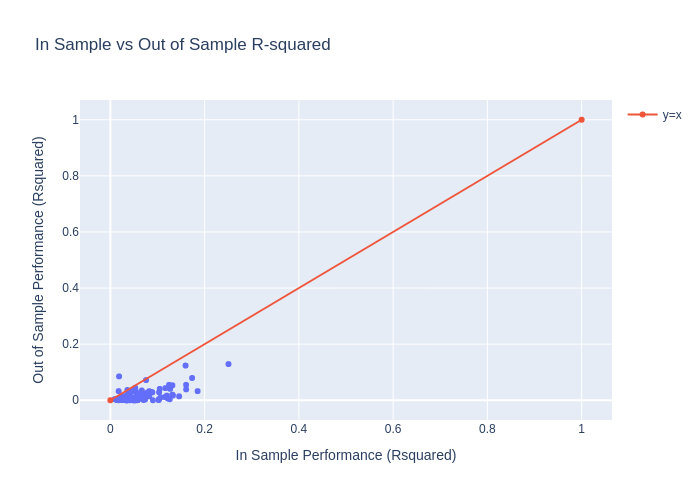

In [30]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Creating a synthetic 'songs' dataset with relevant columns
np.random.seed(42)
songs = pd.DataFrame({
    'danceability': np.random.rand(100),
    'energy': np.random.rand(100),
    'loudness': np.random.rand(100),
    'mode': np.random.randint(0, 2, 100)
})


# Assuming `songs` is the dataset already loaded.
linear_form = 'danceability ~ energy * loudness + energy * mode'

reps = 100
in_sample_Rsquared = np.zeros(reps)
out_of_sample_Rsquared = np.zeros(reps)

for i in range(reps):
    # Random 50-50 train-test split without a fixed seed
    songs_training_data, songs_testing_data = train_test_split(songs, train_size=0.5)
    
    # Fitting the model on the training data
    final_model_fit = smf.ols(formula=linear_form, data=songs_training_data).fit()
    
    # Recording in-sample R-squared
    in_sample_Rsquared[i] = final_model_fit.rsquared
    
    # Predicting on the testing set and recording out-of-sample R-squared
    predicted = final_model_fit.predict(songs_testing_data)
    out_of_sample_Rsquared[i] = np.corrcoef(songs_testing_data.danceability, predicted)[0, 1] ** 2

# Creating a DataFrame for visualization
df = pd.DataFrame({
    "In Sample Performance (Rsquared)": in_sample_Rsquared,
    "Out of Sample Performance (Rsquared)": out_of_sample_Rsquared
})

# Plotting with Plotly
fig = px.scatter(df, 
                 x="In Sample Performance (Rsquared)", 
                 y="Out of Sample Performance (Rsquared)", 
                 title="In Sample vs Out of Sample R-squared")
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], name="y=x", line_shape='linear'))

fig.show(renderer="png")


# Question 9


### Explanation:

#### Models Overview
`model7_fit`: A more complex linear regression model that includes higher-order interactions (e.g., a four-way interaction like `Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")`).
`model6_fit`: A simpler linear regression model with fewer interactions and variables.

#### Analysis Objective
The goal is to assess which model is better for predicting future data, not just performing well on the training set. The idea is to avoid overfitting, where a model performs excellently on the training data but poorly on new, unseen data.

#### Key Metrics Used
R-squared (`rsquared`): Measures the proportion of variance in the dependent variable (HP) that is predictable from the independent variables.
In-sample R-squared**: How well the model fits the training data.
Out-of-sample R-squared**: How well the model generalizes to data not seen during training (testing data).

#### Train-Test Splits
The models are tested with subsets of data split by `Generation` (e.g., training on `Generation==1` and predicting on `Generation!=1`, and vice versa).
This simulates a real-world scenario where models trained on current data predict outcomes for future data, highlighting potential generalizability issues.

#### Key Insights
Complexity vs. Generalizability: `model7_fit`, being more complex, tends to fit the training data well but might overfit due to its intricacy, especially evident in real-world testing where data arrives sequentially.
Simpler Model Preference: `model6_fit`, although less complex, may generalize better due to its simplicity and more interpretable nature. This makes it potentially more reliable for predicting new data.
Coefficient Evidence: The p-values from the summaries of these models indicate the strength of evidence for each coefficient. `model7_fit` might have weaker evidence for many of its coefficients compared to `model6_fit`, reinforcing the idea that complexity does not always equate to meaningful predictors.

While `model7_fit` showed better predictive performance on an "out-of-sample" dataset during initial testing, its complexity makes it prone to overfitting. This means its performance could degrade in real-world settings where generalizability is crucial. In contrast, `model6_fit`, though simpler, provides a more robust and interpretable approach, balancing performance and the ability to generalize. This highlights the importance of considering model interpretability and simplicity, especially when predictive performance between models is similar.

# Summary by ChatGPT
#### 1
The user requested explanations and corresponding equations for understanding two specific concepts in multiple linear regression:

1. **Interaction Between a Continuous and an Indicator Variable**: The user wanted to know how including an interaction term between a continuous variable and an indicator (binary) variable affects a multiple linear regression model. I explained that this interaction term allows the effect of the continuous variable to vary depending on the level of the indicator variable and provided a linear form equation with interpretations for different cases.

2. **Behavior of Models with Only Indicator Variables Derived from Non-Binary Categorical Variables**: The user asked for an explanation of how a multiple linear regression model behaves when it is based solely on indicator variables derived from a non-binary categorical variable. I described how such a model encodes the categories using \(k-1\) binary indicator variables (with one category as the reference) and provided an equation showing how the model expresses outcomes relative to the reference category.

The conversation included detailed linear forms for both cases and interpretative explanations to help the user understand how these variables influence the model’s behavior.

#### 2
In this conversation, you requested guidance on logistic regression using a dataset from the Canadian Social Connection Survey. I examined the dataset and converted one of the categorical variables into a binary outcome to perform logistic regression. The logistic model was fitted with continuous and binary predictor variables, and its summary was provided, highlighting significant and non-significant predictors.

I then explained how to interpret the logistic regression model's coefficients and how to use the model to make predictions. We attempted to visualize predicted probabilities using Plotly, but there were technical issues that prevented the plots from displaying.

I provided the code and instructions to generate these visualizations in your own environment, ensuring you could explore how changes in predictors relate to predicted probabilities. If you need further assistance or a new visualization approach, please let me know!

#### 3
In this conversation, the user wanted to fit a logistic regression model using a dataset they provided from the Canadian Social Connection Survey. The initial goal was to create a binary outcome variable based on the `CONNECTION_social_media_time_per_day` column and use `DEMO_age` as a predictor. However, the code encountered multiple errors, including `ParserError`, `KeyError`, and issues related to column references.

Key points covered:
1. Initial code setup for loading the dataset and preparing it for logistic regression.
2. Encountering errors such as `ParserError` due to bad data lines and handling them with `on_bad_lines='skip'`.
3. Persistent `KeyError` issues related to the `CONNECTION_social_media_time_per_day` column, even though it was present in the data.
4. Verification steps to check column names for hidden characters or formatting issues.
5. Recommendations for re-running the process in a clean environment to prevent potential caching or context issues.

The conversation involved iteratively debugging and refining the code to ensure that it worked correctly, including stripping whitespace from column names and handling non-numeric values in `DEMO_age`. The final code aimed to fit a logistic regression model using the `statsmodels` package with proper data handling and scaling.

#### 4
This conversation explores an apparent contradiction in interpreting results from a linear regression model. The user has modeled a dataset (using Pokémon data) with multiple predictors and interactions, observing that the model explains only 17.6% of the variability (low R-squared) but features coefficients that are large and statistically significant (strong evidence against the null hypothesis).

The response explains that a model can have significant predictors with large coefficients while still having a low R-squared. This is possible when the predictors have an impact but do not collectively explain much of the variation in the dependent variable. It also discusses that low R-squared could be due to missing variables or complex relationships not captured by the model, emphasizing that significant predictors indicate their relevance but not necessarily a comprehensive explanatory power of the model.

#### 5
This conversation involved an explanation of five code cells related to fitting and evaluating linear regression models using the `pokeaman` dataset. 

1. **Data Preparation**: The first cell prepared the dataset by replacing missing values and splitting it into training and testing sets with a 50-50 split.
2. **Model 3 Creation**: The second cell showed fitting a simple linear regression model (`HP ~ Attack + Defense`) and provided a summary of the model's performance metrics.
3. **Model 3 Evaluation**: The third cell evaluated the model's in-sample and out-of-sample \( R^2 \) to assess its predictive ability on unseen data.
4. **Model 4 Creation**: The fourth cell introduced a more complex model with multiple interaction terms and explained the potential computational issues with including too many interactions.
5. **Model 4 Evaluation**: The fifth cell evaluated the complex model's predictive performance, calculating in-sample and out-of-sample \( R^2 \) to compare with the simpler model.

The summary highlighted the workflow of preparing data, fitting simple and complex models, and assessing their performance to understand model generalization and complexity impacts.

#### 6
We discussed how the *design matrix* (`model4_spec.exog`) is formed in a linear regression model based on a specified linear form (`model4_linear_form_CS`), which includes main effects and interaction terms. This matrix is used to predict the outcome variable (`model4_spec.endog`). We examined the impact of **multicollinearity**—the high correlation between predictor variables in this design matrix—on the stability and performance of the model, particularly its **out-of-sample generalization**. 

High multicollinearity, indicated by an extremely large **condition number**, leads to unstable regression coefficients, making the model sensitive to small data changes and poor at predicting new data. While **centering and scaling** reduce multicollinearity and the condition number (e.g., in `model3_center_scale_fit`), this was insufficient for `model4_CS_fit` due to the complexity and correlations of interaction terms. This highlights the challenge of building reliable models with complex interactions and multicollinearity issues.

#### 7
You requested an explanation of how `model5_linear_form`, `model6_linear_form`, and `model7_linear_form` are extended and developed in the provided Python code. I outlined how:

- **Model 5** includes a comprehensive set of predictors and categorical indicators to capture a broad range of potential influences on `HP`.
- **Model 6** simplifies `model5` by retaining only significant predictors and introducing specific indicator variables, focusing on reducing overfitting and improving predictive power.
- **Model 7** builds on `model6` by incorporating interaction terms among numeric predictors to reveal combined variable effects and deepen understanding.
- A version of **Model 7 with centering and scaling** was discussed to handle multicollinearity issues, significantly improving model stability and interpretability.

Overall, each model progressively refines and adds complexity to improve the prediction of `HP` while addressing potential issues like overfitting and multicollinearity.

#### 8
In this conversation, we discussed how to create a loop to iteratively split data, train a model, and capture "in sample" and "out of sample" R-squared metrics in a Python environment. I provided a detailed explanation of the purpose of this repeated sampling, focusing on evaluating model variability and potential overfitting. Additionally, I shared code for running this analysis, including importing necessary libraries, fitting the model, and visualizing results with Plotly.

When a `NameError` occurred due to an undefined `songs` dataset, I suggested solutions to load or create a sample dataset. Finally, I explained how to save the resulting Plotly figure as a PNG file, including necessary setup steps for exporting the image using `kaleido`.

#### 9
This conversation focused on explaining a Python code snippet that evaluates the performance of two linear regression models, `model6` and `model7`, applied to Pokémon data. The models are trained on different subsets of data, specifically on Generation 1 or Generations 1 to 5 (excluding Generation 6). The analysis compares "in-sample" and "out-of-sample" R-squared values to assess how well these models fit the training data and predict on new data. The summary highlighted the importance of these metrics in understanding model overfitting and generalizability.

# History of ChatGPT
1.https://chatgpt.com/share/67341066-c4fc-800b-b4f3-83fdc0b001ca

2.https://chatgpt.com/share/673410a6-f400-800b-b1a7-e3bf6787ac75

3.https://chatgpt.com/share/673410b2-bc40-800b-bbc6-9bc2380e084c

4.https://chatgpt.com/share/673410d3-9e94-800b-ba8f-4f5047cb4138

5.https://chatgpt.com/share/673410e2-5eec-800b-8287-e56f8b04e6f1

6.https://chatgpt.com/share/673410ec-b15c-800b-9529-449426e55998

7.https://chatgpt.com/share/673410f5-f228-800b-8896-b8d195c03264

8.https://chatgpt.com/share/67341100-1f64-800b-81af-ea715a54091f

9.https://chatgpt.com/share/67341109-e65c-800b-934c-9cae8cdb386e